[ 모듈 로딩 및 데이터 준비 ]

In [2]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import koreanize_matplotlib

In [3]:
# 데이터 준비
vietnam_production = './yield_vietnam.xlsx'
vietnam_weather = './선라 기후.xlsx'

production = pd.read_excel(vietnam_production)
weather = pd.read_excel(vietnam_weather)

# 정보 확인
production.info()
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     14 non-null     object 
 1   Element  14 non-null     object 
 2   Year     14 non-null     int64  
 3   Unit     14 non-null     object 
 4   Value    14 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 692.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점명            181 non-null    object        
 1   시간(UTC)        181 non-null    datetime64[ns]
 2   월평균 기온         144 non-null    float64       
 3   일평균 기온의 월표준편차  144 non-null    float64       
 4   월평균 일최고기온      144 non-null    float64       
 5   월평균 일최저기온      144 non-null    float64       
 6   최대 일강수량        134 non-null    float64       
 

[ 결측치 확인 및 처리]

In [4]:
# 날씨의 평균온도 데이터 '-99.0' --> 결측치로 변환 --> 앞의 값 동일 처리하기
weather = weather.replace(-99.90, np.nan)
weather = weather.replace(-40.90, np.nan)

# 결측치 확인
weather.isna().sum()
production.isna().sum()

Area       0
Element    0
Year       0
Unit       0
Value      0
dtype: int64

In [5]:
# 연도, 월 컬럼 생성
weather['월'] = weather['시간(UTC)'].dt.month
weather['연도'] = weather['시간(UTC)'].dt.year
temperature_mean = weather.groupby('월')['월평균 기온'].mean()
temperature_mean = list(map(float, temperature_mean)) 
temperature_mean
for idx in range(len(weather)):
    if pd.isnull(weather.loc[idx, '월평균 기온']):
        for month in range(1,13):
            if weather.loc[idx, '월'] == month:
                weather.loc[idx,'월평균 기온'] = temperature_mean[month-1]

# 월 평균 기온 소수점 두번째 자리까지 반올림
weather['월평균 기온'] = weather['월평균 기온'].round(2)

# 데이터 확인
weather.head(50)    

,지점명,시간(UTC),월평균 기온,일평균 기온의 월표준편차,월평균 일최고기온,월평균 일최저기온,최대 일강수량,월중 최대풍속,월중 최대풍속 날,월일조시간,월,연도
0,선 라,2010-01-31,15.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2010
1,선 라,2010-02-22,17.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2010
2,선 라,2010-03-31,20.60,5.6,27.6,15.6,42.3,15.0,6.0,179.0,3,2010
3,선 라,2010-04-30,23.60,2.6,30.1,19.0,39.3,14.0,28.0,194.0,4,2010
4,선 라,2010-05-31,26.30,1.9,32.0,22.6,476.0,NaN,NaN,226.0,5,2010
5,선 라,2010-06-30,26.10,1.6,31.1,22.8,NaN,NaN,NaN,164.0,6,2010
6,선 라,2010-07-31,26.10,1.3,30.8,23.1,37.9,8.0,5.0,177.0,7,2010
7,선 라,2010-08-31,24.90,5.6,NaN,NaN,34.4,14.0,1.0,159.0,8,2010
8,선 라,2010-09-22,24.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2010
9,선 라,2010-10-31,21.70,1.8,26.5,18.5,0.9,NaN,NaN,165.0,10,2010


[ 데이터 처리 ]

1. 필요한 데이터만 추출 <hr>

In [ ]:
# 베트남 원두 생산량의 'Year'와 'Value'추출
production_Year = production['Year']
production_Value = production['Value']
production_Year
production_Value

0     2160.0
1     2347.1
2     2201.3
3     2282.0
4     2387.7
5     2446.9
6     2444.5
7     2548.7
8     2611.7
9     2702.7
10    2766.0
11    2824.6
12    2979.0
13    2933.9
Name: Value, dtype: float64

In [ ]:
# 선 라 기상 데이터의 '시간'과 '월평균 기온' 추출
weather_temperature = weather['월평균 기온']
avg_temperature = weather[['시간(UTC)', '월평균 기온']].copy()
avg_temperature['연도'] = avg_temperature['시간(UTC)'].dt.year

# 선 라 기상 데이터의 월 평균 온도를 연도별로 구하기
mean_temperature = avg_temperature.groupby('연도')['월평균 기온'].mean()

# 2010년에서 2023년까지 추출
mean_temperature = mean_temperature.loc[2010:2023]

# 데이터 확인
mean_temperature

연도
2010    21.829167
2011    21.110833
2012    22.060000
2013    21.376667
2014    21.840000
2015    22.181667
2016    21.380833
2017    21.681667
2018    21.608333
2019    22.656667
2020    22.158333
2021    21.920833
2022    21.835000
2023    22.340000
Name: 월평균 기온, dtype: float64

[ 시각화 ]

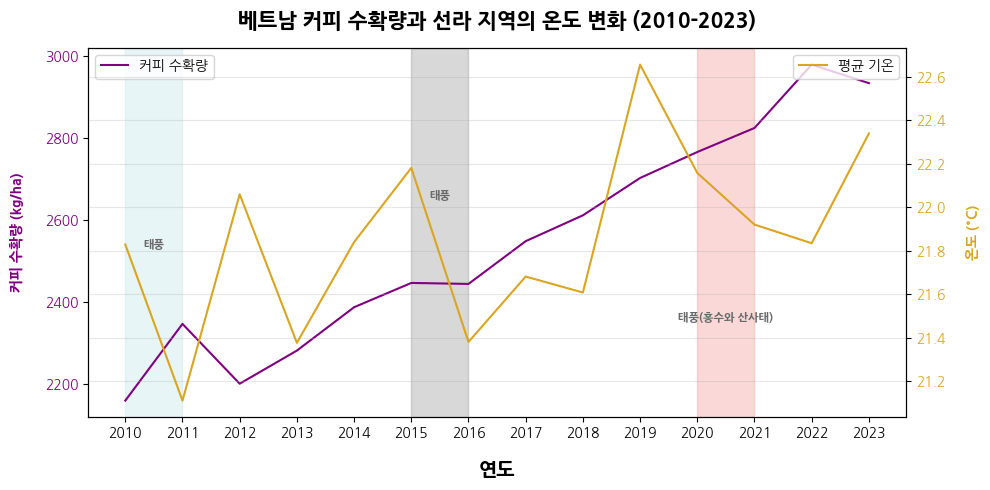

In [24]:
# 그래프 생성
fig, ax1 = plt.subplots(figsize = (10, 5))

# x축과 왼쪽 y축 생성
ax1 = plt.gca() 
ax1.plot(production_Year, production_Value, label = '커피 수확량', color = 'purple')
ax1.set_xlabel('연도', fontsize = 14, labelpad = 15, fontweight = 'bold')
ax1.set_ylabel('커피 수확량 (kg/ha)', color = 'purple', labelpad = 15, fontweight = 'bold')
ax1.tick_params(axis = 'y', labelcolor = 'purple')

# 오른쪽 y축 생성
ax2 = ax1.twinx() 
ax2.plot(mean_temperature.index, mean_temperature.values, 'goldenrod', label = '평균 기온')
ax2.set_ylabel('온도 (°C)', color = 'goldenrod', labelpad = 15, fontweight = 'bold')
ax2.tick_params(axis = 'y', labelcolor = 'goldenrod')

ax1.axvspan(2010, 2011, color = 'powderblue', alpha = 0.3)
ax1.axvspan(2015, 2016, color = 'grey', alpha = 0.3)
ax1.axvspan(2020, 2021, color = 'lightcoral', alpha = 0.3)

# 범례 설정
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')


ax1.text(2010.5, max(production_Value)*0.85, '태풍', fontsize = 8, color = 'dimgray', ha = 'center', fontweight = 'bold')
ax1.text(2015.5, max(production_Value)*0.89, '태풍', fontsize = 8, color = 'dimgray', ha = 'center', fontweight = 'bold')
ax1.text(2020.5, max(production_Value)*0.79, '태풍(홍수와 산사태)', fontsize = 8, color = 'dimgray', ha = 'center', fontweight = 'bold')

# 제목, 눈금선 그리기
plt.title('베트남 커피 수확량과 선라 지역의 온도 변화 (2010-2023)', fontsize = 15, pad = 15, fontweight = "bold")
ax1.set_xticks(production_Year)
plt.grid(True, alpha = 0.3)
plt.tight_layout()

[ 베트남 원두 생산량과 월 평균 기온 관계 (산점도와 회귀선) ]

In [ ]:
# 베트남 지역의 원두 생산량의 '연도'와 '생산량'만 추출
production_two = production[['Year', 'Value']]
production_two

,Year,Value
0,2010,2160.0
1,2011,2347.1
2,2012,2201.3
3,2013,2282.0
4,2014,2387.7
5,2015,2446.9
6,2016,2444.5
7,2017,2548.7
8,2018,2611.7
9,2019,2702.7


In [ ]:
# 베트남 지역의 원두 생산량의 '연도'와 '생산량'의 이름 바꾸기
production_one = production_two.rename(columns={'Year':'연도',
                       'Value':'값'})

In [11]:
# '연도'열을 인덱스로 설정
production_one.set_index('연도')

,값
연도,
2010,2160.0
2011,2347.1
2012,2201.3
2013,2282.0
2014,2387.7
2015,2446.9
2016,2444.5
2017,2548.7
2018,2611.7


In [12]:
# '연도'를 기준으로 병합
df_combined = pd.merge(production_one, mean_temperature , on='연도', how= 'left')

# '연도'를 인덱스로 설정
df_combined = df_combined.set_index('연도')

# 확인
df_combined

# 상관계수 구하기
df_combined.corr()

,값,월평균 기온
값,1.000000,0.424384
월평균 기온,0.424384,1.000000


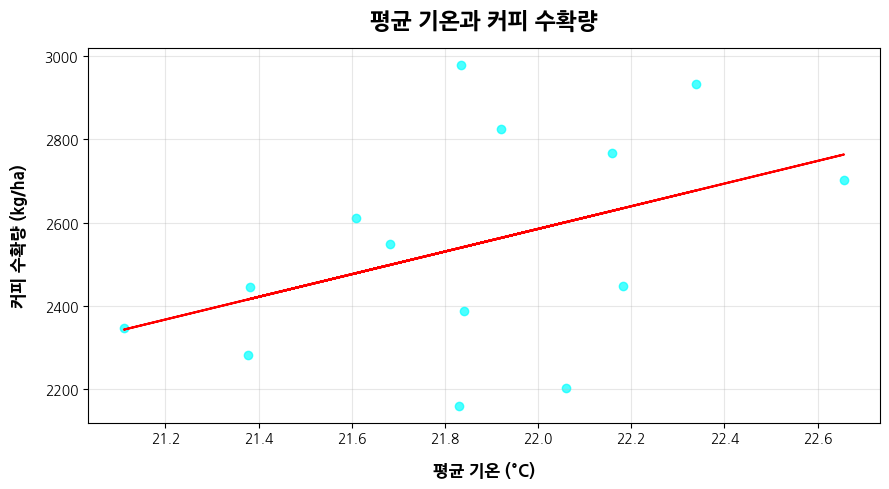

In [23]:
# 산점도 그리기
plt.figure(figsize = (9, 5))
plt.scatter(df_combined["월평균 기온"], df_combined["값"], color = "cyan", alpha = 0.7)

# 그래프 꾸미기
plt.title("평균 기온과 커피 수확량", fontsize = 16, fontweight = "bold", pad = 15)
plt.xlabel("평균 기온 (°C)", fontsize = 12, labelpad = 12, fontweight = 'bold')
plt.ylabel("커피 수확량 (kg/ha)", fontsize = 12, labelpad = 12, fontweight = 'bold')
plt.grid(alpha = 0.3)

# 회귀선 계산
x = df_combined["월평균 기온"]
y = df_combined["값"]
coefficients = np.polyfit(x, y, 1) 
regression_line = np.poly1d(coefficients)

# 회귀선 그리기
plt.plot(x, regression_line(x), color = "red", label = "회귀선")

# 그래프 표시
plt.tight_layout()
plt.show()